<a href="https://colab.research.google.com/github/cagBRT/AzureNotebooks/blob/master/EdgeDec_Gary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sobel Edge Detection
It finds the largest increase in intensity from light to dark and emphasises on those pixels giving an edge enhanced image.

Syntax: dst = cv2.Sobel(src, ddepth, dx, dy, ksize) Where, ddepth is the depth of the destination image, dx is Horizontal sobel derivative, dy is vertical sobel derivative and ksize is the kernel size.

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

#import requests
#url = "/content/20231127_102906.jpg"
#r = requests.get(url)
##with open('test.jpg', 'wb') as f:
#    f.write(r.content)

In [4]:
img = cv2.imread('/content/20231127_102906 (1).jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.GaussianBlur(gray,(3,3),0)

alpha 1  beta 0      --> no change  
0 < alpha < 1        --> lower contrast  
alpha > 1            --> higher contrast  
-127 < beta < +127   --> good range for brightness values

In [5]:
alpha=2
beta=0
new_img = alpha*img + beta

The process in which we modify the intensity values of pixels in a given image to make the image more appealing to the senses is called normalization of the image.<br>
The contrast of the image can be increased which helps in extracting the features from the image and in image segmentation using image normalization.<br>
The noise content from the image can also be removed using Image Normalization.<br>
We make use of a function called normalize() function in OpenCV to perform the normalization of images.<br>
The normalize() function takes five parameters namely source_array, destination_array, alpha, beta and normalization_type.<br>
The parameter source_array is the array corresponding to the input image which is to be normalized.<br>
The parameter destination_array is the array corresponding to the output image which is normalized.<br>
The parameter alpha represents the lower range boundary value.<br>
The parameter beta represents the upper range boundary value.<br>
The parameter normalization_type represents the type of normalization.<br>
The normalize() function returns the normalized image as the output. <br>


In [6]:
resultimage = np.zeros((800, 800))
normalizedimage = cv2.normalize(img,resultimage, 0, 100, cv2.NORM_MINMAX)


src − An object of the class Mat representing the source (input) image.<BR>

dst − An object of the class Mat representing the destination (output) image.<BR>

ddepth − An integer variable representing the depth of the image (-1)<BR>

dx − An integer variable representing the x-derivative. (0 or 1)<BR>

dy − An integer variable representing the y-derivative. (0 or 1)<BR>

(-0.5, 1511.5, 2015.5, -0.5)

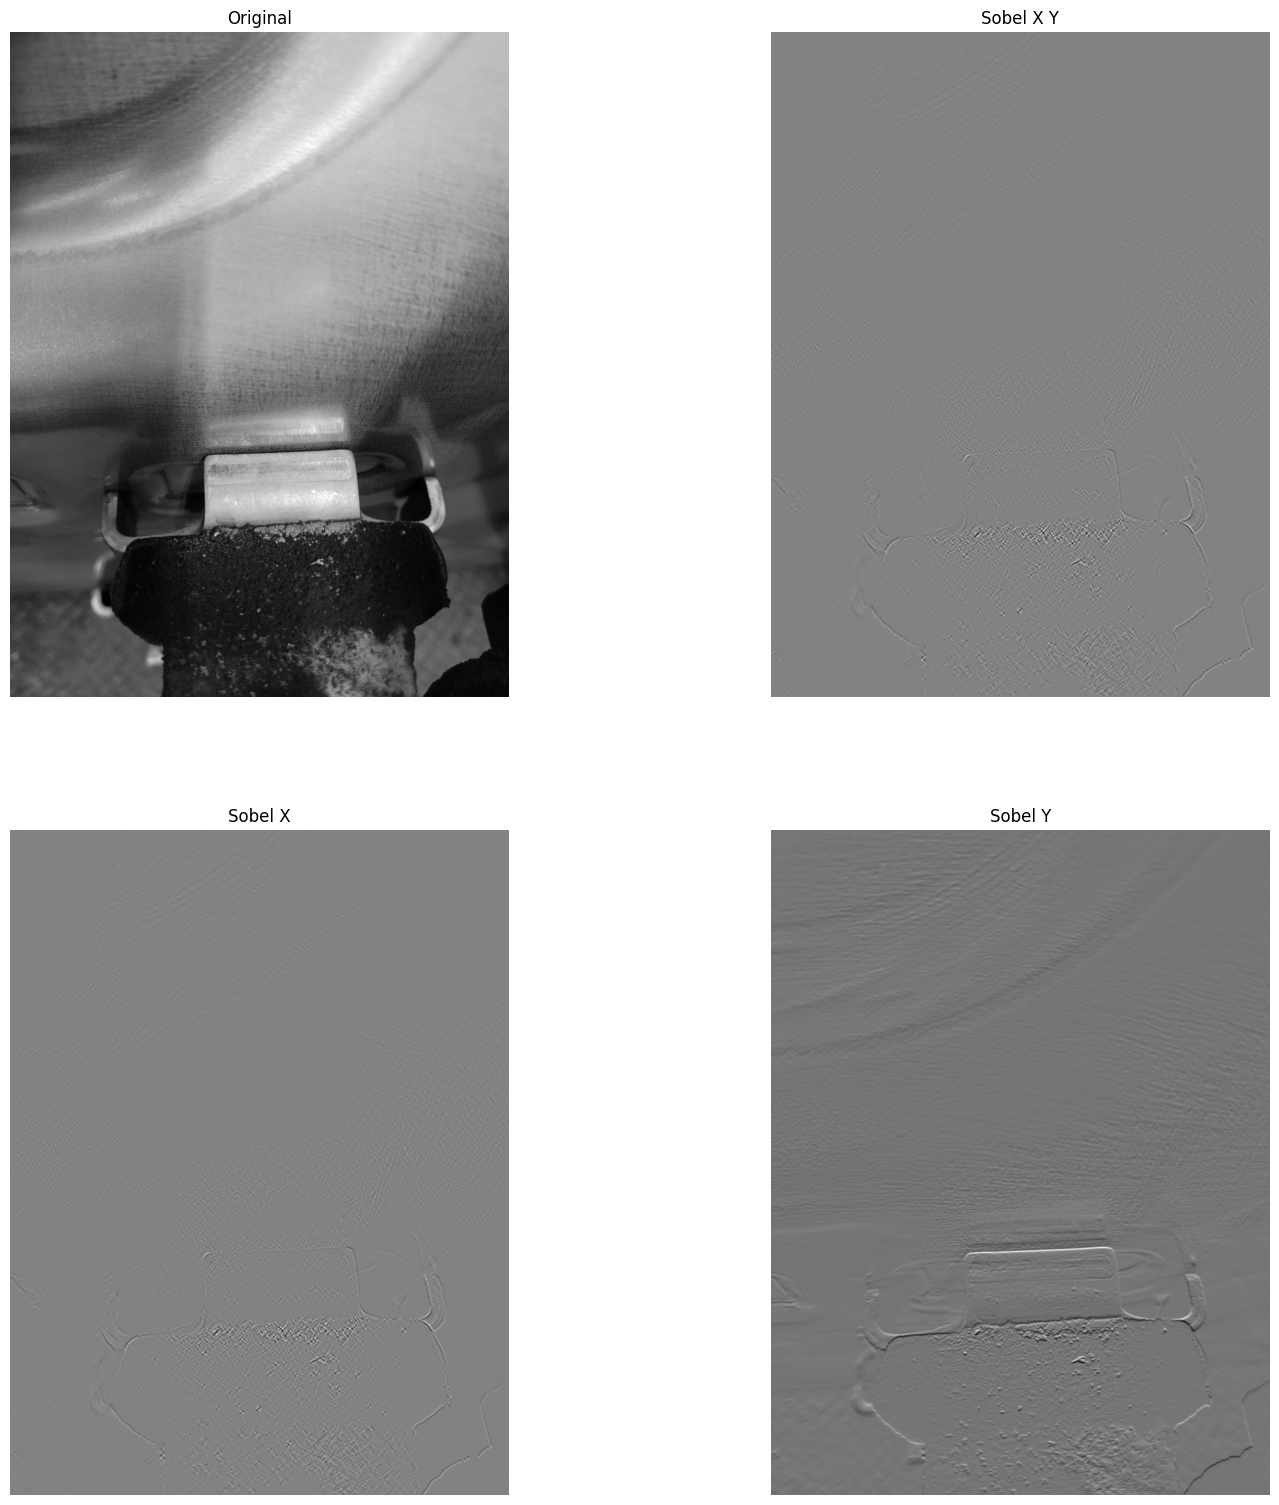

In [7]:
#img=new_img
sobelx = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=11) #DX,DY 0,0. 0,1.  1,0.  1,1

sobely = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=11)

sobelxy = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=11)

plt.figure(figsize=(18,19))
plt.subplot(221)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis("off")

plt.subplot(222)
plt.imshow(sobelxy, cmap='gray')
plt.title('Sobel X Y')
plt.axis("off")

plt.subplot(223)
plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X')
plt.axis("off")

plt.subplot(224)
plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y')
plt.axis("off")

**Canny Edge Detection**<BR>
It is a multi-stage edge detection algorithm. It's use is simplified in OpenCV. The cv2.Canny() method is ued to perform canny edge detection.

Syntax: dest = cv2.canny(src, threshold1, threshold2) Where, threshold1 is the the High threshold value of intensity gradient and threshold2 is the low threshold value of the intensity gradient.

(-0.5, 1511.5, 2015.5, -0.5)

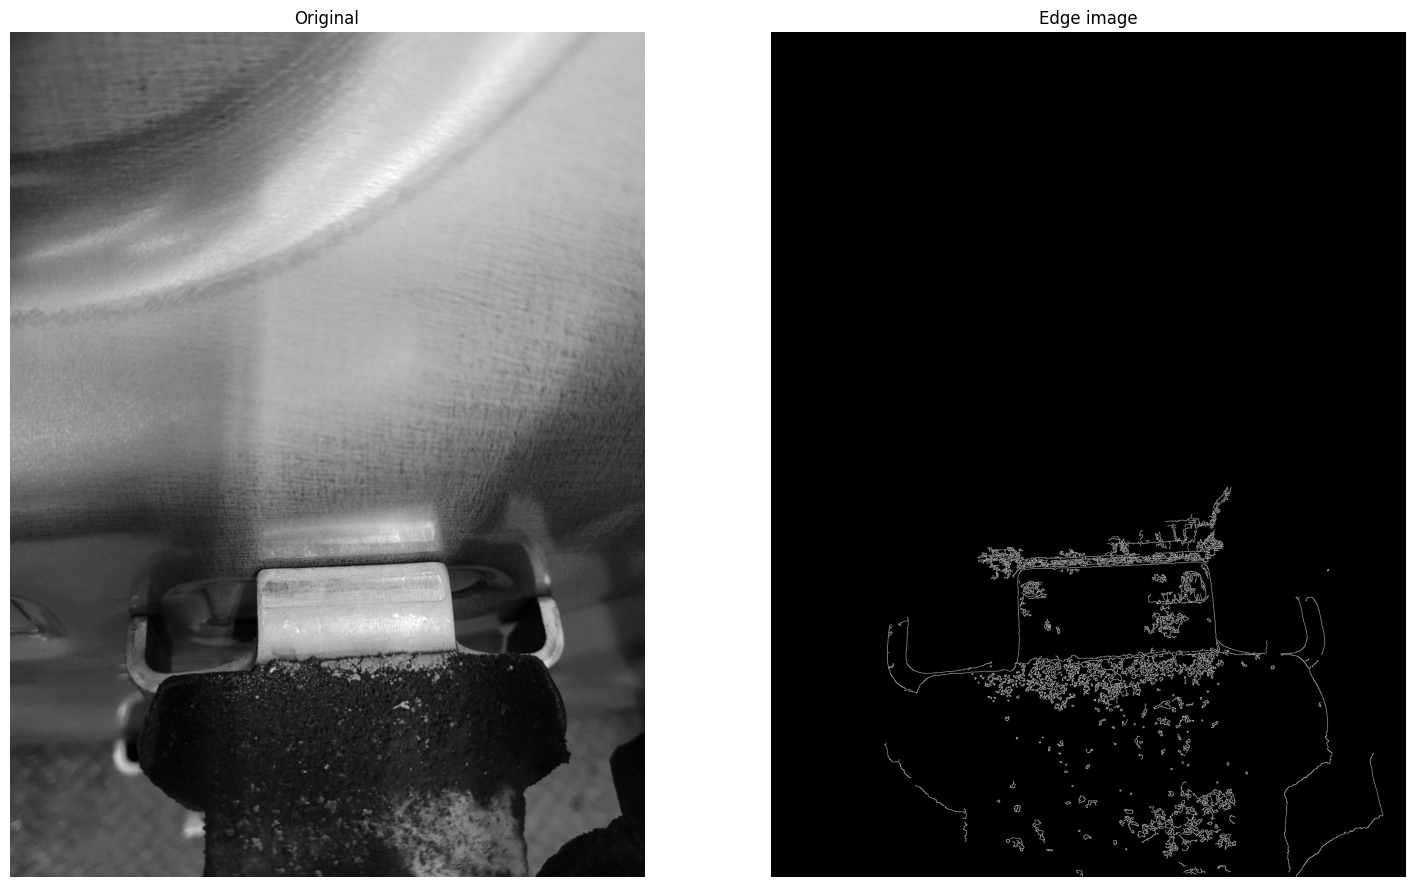

In [8]:
edges = cv2.Canny(image=img, threshold1=30, threshold2=200)

plt.figure(figsize=(18,19))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis("off")

plt.subplot(122)
plt.imshow(edges, cmap='gray')
plt.title('Edge image')
plt.axis("off")



---



---



---



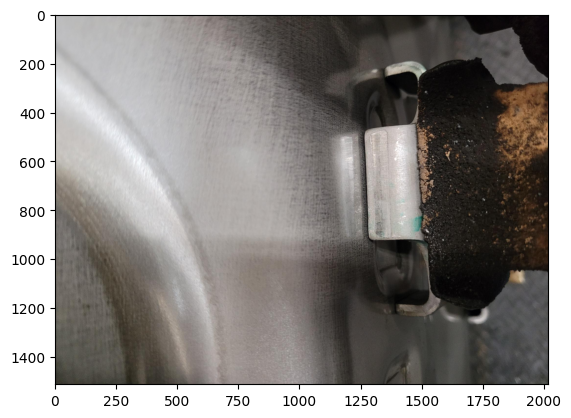

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

# Read in the image
image = mpimg.imread('/content/20231127_102906 (1).jpg')

plt.imshow(image)

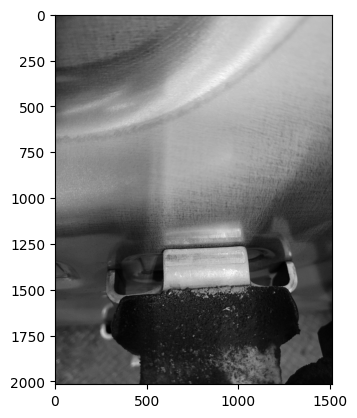

In [11]:
img = cv2.imread('/content/20231127_102906 (1).jpg')
# Convert to grayscale for filtering
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

The Sobel filter is very commonly used in edge detection and in finding patterns in intensity in an image. Applying a Sobel filter to an image is a way of taking (an approximation) of the derivative of the image in the x or y direction, separately.

It's up to you to create a Sobel x operator and apply it to the given image.

For a challenge, see if you can put the image through a series of filters: first one that blurs the image (takes an average of pixels), and then one that detects the edges.

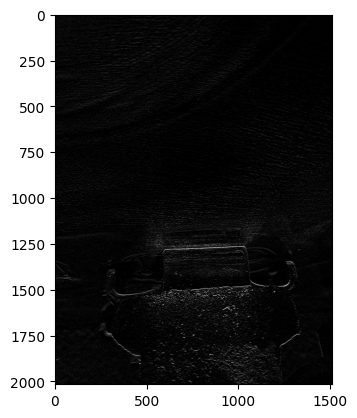

In [12]:
# Create a custom kernel

# 3x3 array for edge detection
sobel_y = np.array([[ -1, -2, -1],
                   [ 0, 0, 0],
                   [ 1, 2, 1]])

## TODO: Create and apply a Sobel x operator
sobel_x = np.array([[-1, 0, 1],
                    [-2,0,2],
                    [-1, 0, 1]])


# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)
filtered_image = cv2.filter2D(gray, -1, sobel_y)

plt.imshow(filtered_image, cmap='gray')

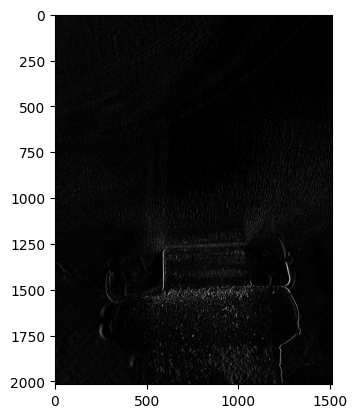

In [13]:
# Create a custom kernel

# 3x3 array for edge detection
sobel_y = np.array([[ -1, -2, -1],
                   [ 0, 0, 0],
                   [ 1, 2, 1]])

## TODO: Create and apply a Sobel x operator
sobel_x = np.array([[-1, 0, 1],
                    [-2,0,2],
                    [-1, 0, 1]])


# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)
filtered_image = cv2.filter2D(gray, -1, sobel_x)

plt.imshow(filtered_image, cmap='gray')

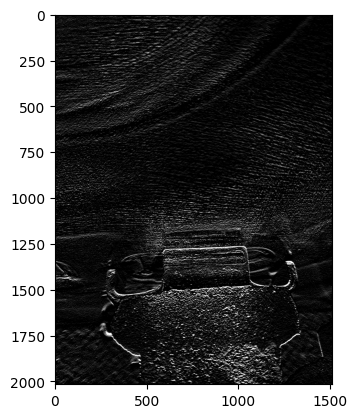

In [14]:
sobel_decimal = np.array([[-1,-1,-2,-1,-1],
                          [-1,-1,-2,-1,-1],
                          [0,0,0,0,0],
                          [1,1,2,1,1],
                         [1,1,2,1,1]])
# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)
filtered_image = cv2.filter2D(gray, -1, sobel_decimal)

plt.imshow(filtered_image, cmap='gray')



---



---



---



Canny Edge detection

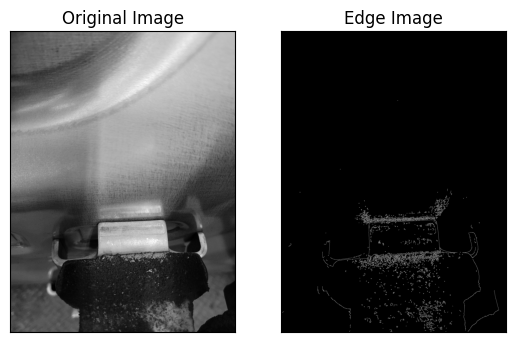

In [16]:
import cv2 as cv

img = cv.imread('/content/20231127_102906 (1).jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
edges = cv.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()



---



---



---

